# IMT 573 - Problem Set 8 - Prediction

### Instructions

Before beginning this assignment, please ensure you have access to a working instance of Jupyter Notebooks with Python 3.

1. First, replace the “YOUR NAME HERE” text in the next cell with your own full name. Any collaborators must also be listed in this cell.

2. Be sure to include well-documented (e.g. commented) code cells, figures, and clearly written text  explanations as necessary. Any figures should be clearly labeled and appropriately referenced within the text. Be sure that each visualization adds value to your written explanation; avoid redundancy – you do no need four different visualizations of the same pattern.

3. Collaboration on problem sets and labs is fun, useful, and encouraged. However, each student must turn in an individual write-up in their own words as well as code/work that is their own. Regardless of whether you work with others, what you turn in must be your own work; this includes code and interpretation of results. The names of all collaborators must be listed on each assignment. Do not copy-and-paste from other students’ responses or code - your code should never be on any other student's screen or machine.

4. All materials and resources that you use (with the exception of lecture slides) must be appropriately referenced within your assignment.

5. Partial credit will be awarded for each question for which a serious attempt at finding an answer has been shown. Students are *strongly* encouraged to attempt each question and document their reasoning process even if they cannot find the correct answer. 

6. After completing the assignment, ensure that your code can run from start to finish without issue. Restart the kernal and run all cells to double check.

Name: Pratiibh Bassi

Collaborators: 

For this assignment, you'll need (at least) the following packages. If the package does not load, be sure it is properly installed.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In this problem set, we will aim to build a model to explain the factors associated with a person having a heart attack.  Thereafter we also look at the predicted values and compute accuracy. We will use a dataset `heart.csv` avaialable from https://archive.ics.uci.edu/dataset/45/heart+disease, which contains health information of each person (these are the predictors) and whether or not the person had a heart attack before (the binary outcome variable). You can download the data `heart.csv` from Canvas. 

The variables are (as described on the webpage):

- age: age of the patient
- sex: sex of the patient (1 = male; 0 = female)
- cp: chest pain type chest pain type (0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3: asymptomatic
- trestbps: resting blood pressure (in mm Hg)
- chol: cholestoral in mg/dl fetched via BMI sensor
- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg: resting electrocardiographic results (0 normal; 1 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV); 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria.)
- thalachh: maximum heart rate achieved
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest
- slope:the slope of the peak exercise ST segment ( 0= upsloping; 1= flat; 2 = downsloping )
- ca: number of major vessels (range : 0-3)
- thal (Thalassemias):  0 = error (in the original dataset 0 maps to NaN's); 1 = fixed defect ; 2 = normal; 3 = reversable defect

- target: 0 = no disease, 1 = disease


### Problem 1: Logistic Regression

Points: 10

As described above, our primary aim in this assignment is to build a model to predct heart attack status -- whether a person had a heart attack or not based on other health information. 

#### (a) Load the data

Load data.  The data should contain 303 rows, and 11 columns. Do some basic checks.  Andwer these questions:
- Do we have any missing values? Are you concerns about missing data?
- What are the data types? Do these make sense for the variables?
- What are ranges of numeric variables, and possible values of categorical variables?  
- What is the rate of heart attacks among these patients?
  
Compare the values with the documentation and comment what do you see.

In [8]:
heart = pd.read_csv("../Downloads/heart.csv")

In [9]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [11]:
heart.shape

(303, 14)

In [15]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [17]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
heart.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [21]:
heart.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [23]:
heart.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

The data is not missing any values, so there are no concerns about missing data.  However for the ca variable, it is described as having a range 0-3, but max is 4 from looking at the data above so there is concerns in that.  And the thal variable indicates that 0 are errors, so all 0 results in this variable should also be removed.

In [26]:
heart = heart[heart['ca'] < 4]
heart = heart[heart['thal'] > 0]
heart.shape

(296, 14)

In [28]:
heart.target.unique()

array([1, 0], dtype=int64)

In [30]:
heart.target.value_counts()
heart.target.mean()

0.5405405405405406

#### (b) Data Cleaning

You probably noticed that all the above variables are coded as numbers. However, not all of these are in fact of numeric (interval, ratio) measure type. Which variables above are inherently non-numeric (nominal or ordinal)? Fix any issues.

In [33]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [35]:
#### categorical variables conversion
heart_copy = heart.copy()

### diag
heart_copy['target'][heart_copy['target'] == 0] = 'no heart attack'
heart_copy['target'][heart_copy['target'] == 1] = 'heart attack'

### sex
heart_copy['sex'][heart_copy['sex'] == 0] = 'female'
heart_copy['sex'][heart_copy['sex'] == 1] = 'male'

### chest pain
heart_copy['cp'][heart_copy['cp'] == 0] = 'typical angina'
heart_copy['cp'][heart_copy['cp'] == 1] = 'atypical angina'
heart_copy['cp'][heart_copy['cp'] == 2] = 'non-anginal pain'
heart_copy['cp'][heart_copy['cp'] == 3] = 'asymptomatic'

### fasting blood sugar
heart_copy['fbs'][heart_copy['fbs'] == 0] = 'lower than 120mg/ml'
heart_copy['fbs'][heart_copy['fbs'] == 1] = 'greater than 120mg/ml'

### restecg: resting electrocardiographic results
heart_copy['restecg'][heart_copy['restecg'] == 0] = 'normal'
heart_copy['restecg'][heart_copy['restecg'] == 1] = 'ST-T wave abnormality'
heart_copy['restecg'][heart_copy['restecg'] == 2] = 'left ventricular hypertrophy'

### exng: exercise induced angina
heart_copy['exang'][heart_copy['exang'] == 0] = 'no'
heart_copy['exang'][heart_copy['exang'] == 1] = 'yes'

### slp: the slope of the peak exercise ST segment
heart_copy['slope'][heart_copy['slope'] == 0] = 'upsloping'
heart_copy['slope'][heart_copy['slope'] == 1] = 'flat'
heart_copy['slope'][heart_copy['slope'] == 2] = 'downsloping'

### thal (Thalassemia)
heart_copy['thal'][heart_copy['thal'] == 1] = 'fixed defect'
heart_copy['thal'][heart_copy['thal'] == 2] = 'normal'
heart_copy['thal'][heart_copy['thal'] == 3] = 'reversable defect'

heart_copy.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca            int64
thal         object
target       object
dtype: object

#### (c) Logistic regression model

Fit a logistic regression model with all the explanatory variables.  Do not forget to convert the categorical ones to categories!

In each case also comment on statistical significance of the results. (Hint : https://www.statsmodels.org/stable/discretemod.html )

In [64]:
y = heart['target']

x = heart.drop('target', axis =1)

In [66]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [68]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [71]:
logistic_regression = sm.Logit(y,x).fit()
logistic_regression.summary()

Optimization terminated successfully.
         Current function value: 0.330081
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  296
Model:                          Logit   Df Residuals:                      283
Method:                           MLE   Df Model:                           12
Date:                Sat, 17 Aug 2024   Pseudo R-squ.:                  0.5215
Time:                        03:57:41   Log-Likelihood:                -97.704
converged:                       True   LL-Null:                       -204.20
Covariance Type:            nonrobust   LLR p-value:                 6.738e-39
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0288      0.020      1.411      0.158      -0.011       0.069
sex           -1.6888      0.470     -3.595      0.000      -2.610      -0.768
cp             0.7783      0.190      4.095      0.000       0.406       1.151
trestbps      -0.0215      0.010     -2.074      0.038      -0.042      -0.001
chol          -0.0035      0.004     -0.877      0.380      -0.011       0.004
fbs            0.5447      0.584      0.932      0.351      -0.601       1.690
restecg        0.4380      0.358      1.222      0.222      -0.264       1.140
thalach        0.0333      0.009      3.818      0.000       0.016       0.050
exang         -0.8055      0.422     -1.910      0.056      -1.632       0.021
oldpeak       -0.3589      0.219     -1.637      0.102      -0.789       0.071
slope          0.8041      0.363      2.213      0.027       0.092       1.516
ca            -1.3353      0.274     -4.879      0.000      -1.872      -0.799
thal          -1.0149      0.313     -3.241      0.001      -1.629      -0.401
==============================================================================
"""

Run EDA(Exploratory Data Analysis) to answer at least 2 questions listd below:
- How is age related to probability of heart attack?
- Are men or women more likely to have heart attack?   
- Is higher blood pressure (`trtbps`) associated with more heart attacks?
- How much more likely is heart attack for someone who has chest pain (`cp type 1`) compared to someone who has chest pain type 3?
- What is the heart attack distribution based on different (`restecg`) categories? 

Age, chol, fbs, restecg, oldpeak are NOT significantly associated with heart attacks (p value > common threshold)

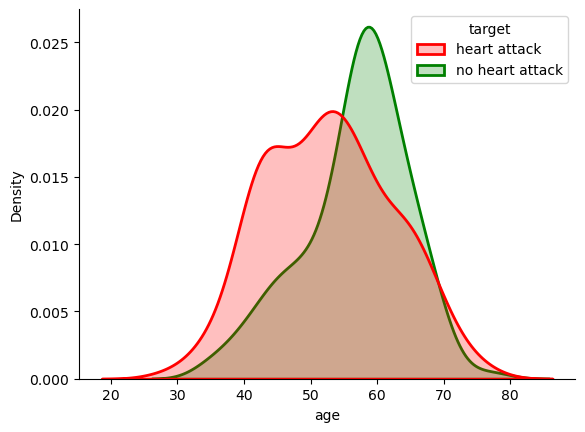

In [76]:
### How is age related to probability of heart attack?
sns.kdeplot(data=heart_copy, x=heart_copy['age'],
            hue=heart_copy['target'], fill=True,
            linewidth=2, palette=["red","green"])
sns.despine(right=True)

plt.show()

In [78]:
# add continuous features together
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

heart_continuous = heart[continuous_features]

heart_continuous.head()

,age,trestbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6


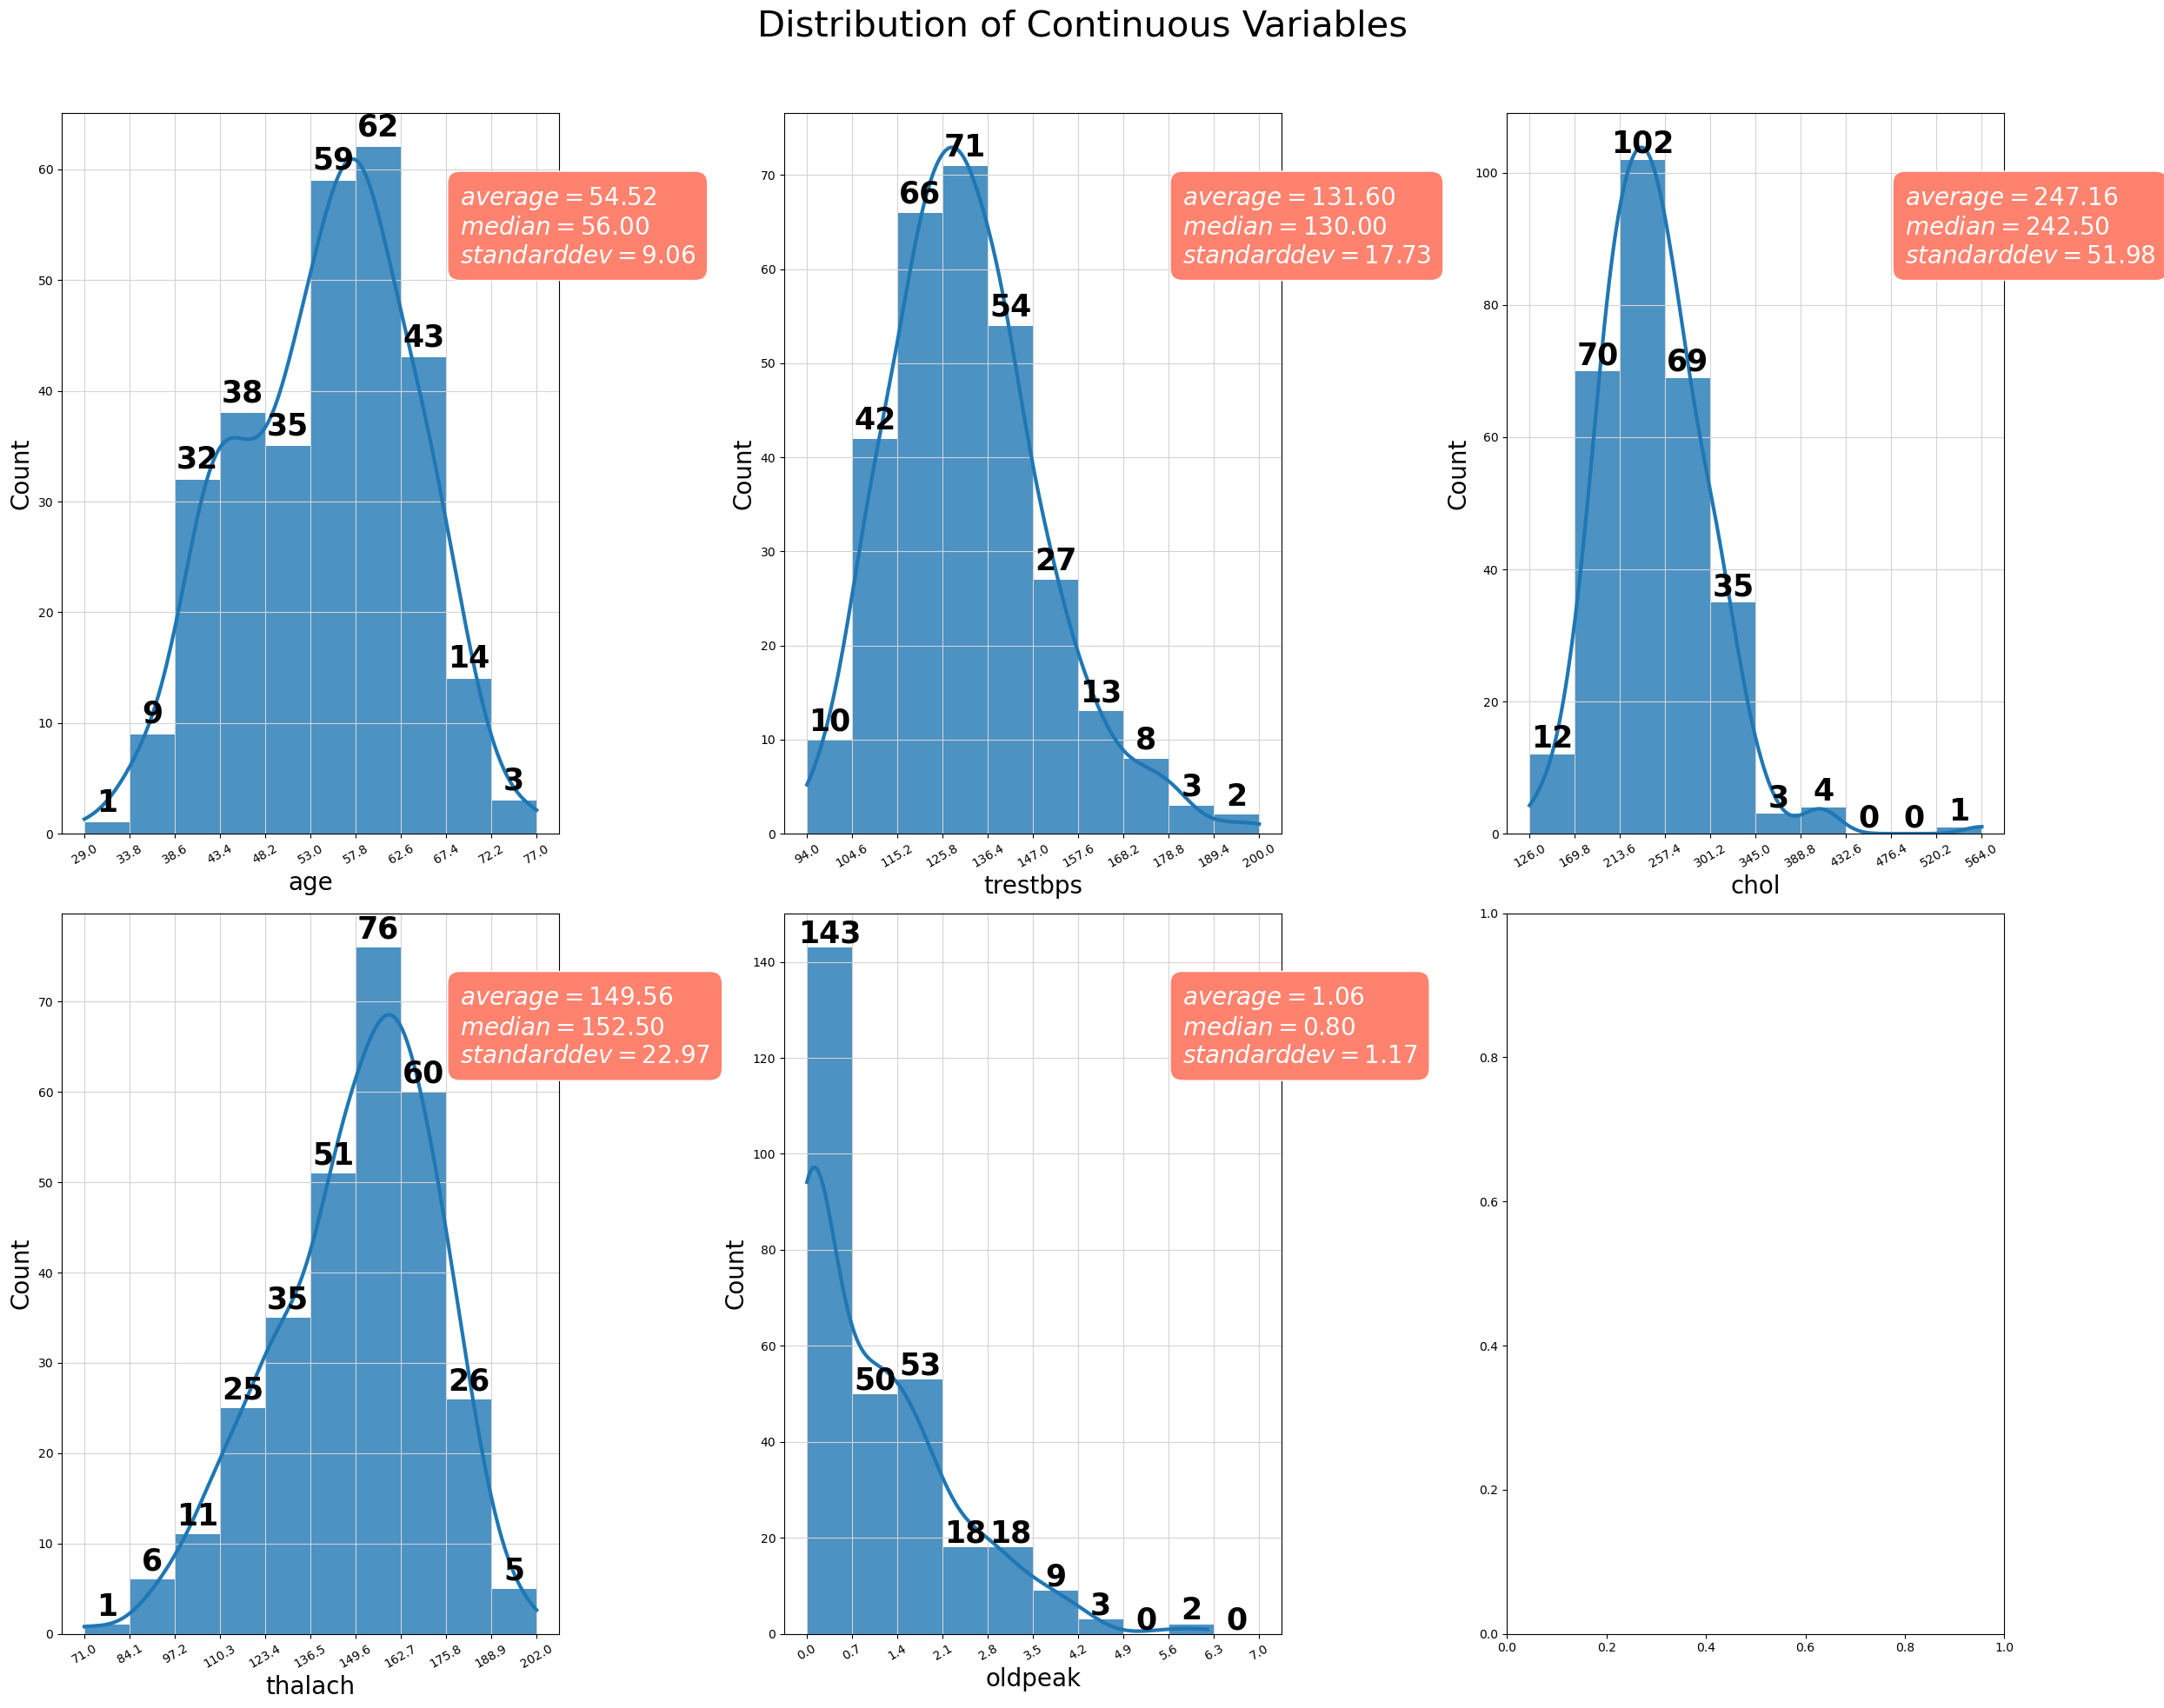

In [80]:
##### source: kaggle: https://www.kaggle.com/code/shahediqbalchowdhury/classification-heart-failure-prediction/code

# Set up the subplot
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(25, 20))

# Loop to plot histograms for each continuous feature
for i, col in enumerate(heart_continuous.columns):
    x = i // 3
    y = i % 3
    values, bin_edges = np.histogram(heart_continuous[col],
                                     range=(np.floor(heart_continuous[col].min()),
                                            np.ceil(heart_continuous[col].max())))
    
    graph = sns.histplot(data=heart_continuous, x=col, bins=bin_edges, kde=True, ax=ax[x, y],
                         edgecolor='none', alpha=0.8, line_kws={'lw': 3})
    ax[x, y].set_xlabel(col, fontsize=20)
    ax[x, y].set_ylabel('Count', fontsize=20)
    ax[x, y].set_xticks(np.round(bin_edges, 5))
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=30)
    ax[x, y].grid(color='lightgrey')

    for j, p in enumerate(graph.patches):
        ax[x, y].annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                          ha='center', fontsize=25, fontweight='bold')

    textstr = '\n'.join(
        ('$average=%.2f$' % heart_continuous[col].mean(),
         '$median=%.2f$' % heart_continuous[col].median(),
         '$standard dev=%.2f$' % heart_continuous[col].std())
    )
    ax[x, y].text(0.8, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=20, verticalalignment='top',
                  color='white', bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white', pad=0.5))

plt.suptitle('Distribution of Continuous Variables', fontsize=30)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

In [82]:
heart_copy.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [86]:
heart_copy.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca            int64
thal         object
target       object
dtype: object

In [128]:
heart_copy1 = heart.copy()

In [130]:
### Are men or women more likely to have heart attack?

df_sum = heart_copy1.groupby(['sex'])['target'].sum()
df_mean = heart_copy1.groupby(['sex'])['target'].mean()

df_sum = df_sum.reset_index('sex')
df_mean = df_mean.reset_index('sex')

df_gender = df_sum.merge(df_mean, on ='sex')

df_gender = df_gender.rename(columns={"target_x": "# of patients", "target_y": "% of heart attack"})
df_gender

,sex,# of patients,% of heart attack
0,0,71,0.747368
1,1,89,0.442786


<Axes: xlabel='sex', ylabel='count'>

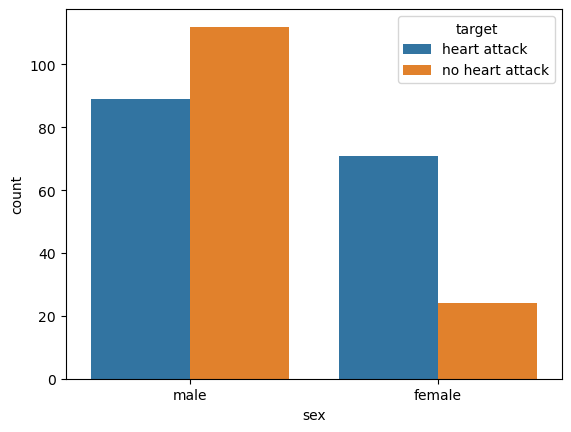

In [132]:
sns.countplot(data=heart_copy, x='sex', hue = 'target')

In [134]:
### Is higher blood pressure (trestbps) associated with more heart attacks?
#### answered in the subplot

In [136]:
### How much more likely is heart attack for someone who has chest pain (cp type 1) compared to someone who has chest pain type 3?
### What is the heart attack distribution based on different (restecg) categories?

In [151]:
# Filter out categorical features for the univariate analysis
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

categorical_features = heart_copy.columns.difference(continuous_features)
heart_categorical = heart_copy[categorical_features]

heart_categorical.head()

,ca,cp,exang,fbs,restecg,sex,slope,target,thal
0,0,asymptomatic,no,greater than 120mg/ml,normal,male,upsloping,heart attack,fixed defect
1,0,non-anginal pain,no,lower than 120mg/ml,ST-T wave abnormality,male,upsloping,heart attack,normal
2,0,atypical angina,no,lower than 120mg/ml,normal,female,downsloping,heart attack,normal
3,0,atypical angina,no,lower than 120mg/ml,ST-T wave abnormality,male,downsloping,heart attack,normal
4,0,typical angina,yes,lower than 120mg/ml,ST-T wave abnormality,female,downsloping,heart attack,normal


In [159]:
### How much more likely is heart attack for someone who has chest pain (cp type 1) compared to someone who has chest pain type 3?
df_sum1 = heart_copy1.groupby(['cp'])['target'].sum()
df_mean1 = heart_copy1.groupby(['cp'])['target'].mean()

df_sum1 = df_sum1.reset_index('cp')
df_mean1 = df_mean1.reset_index('cp')

df_cp = df_sum1.merge(df_mean1, on ='cp')

df_cp = df_cp.rename(columns={"target_x": "# of patients", "target_y": "% of heart attack"})
df_cp

,cp,# of patients,% of heart attack
0,0,39,0.276596
1,1,40,0.816327
2,2,65,0.783133
3,3,16,0.695652


In [147]:
### What is the heart attack distribution based on different (restecg) categories?

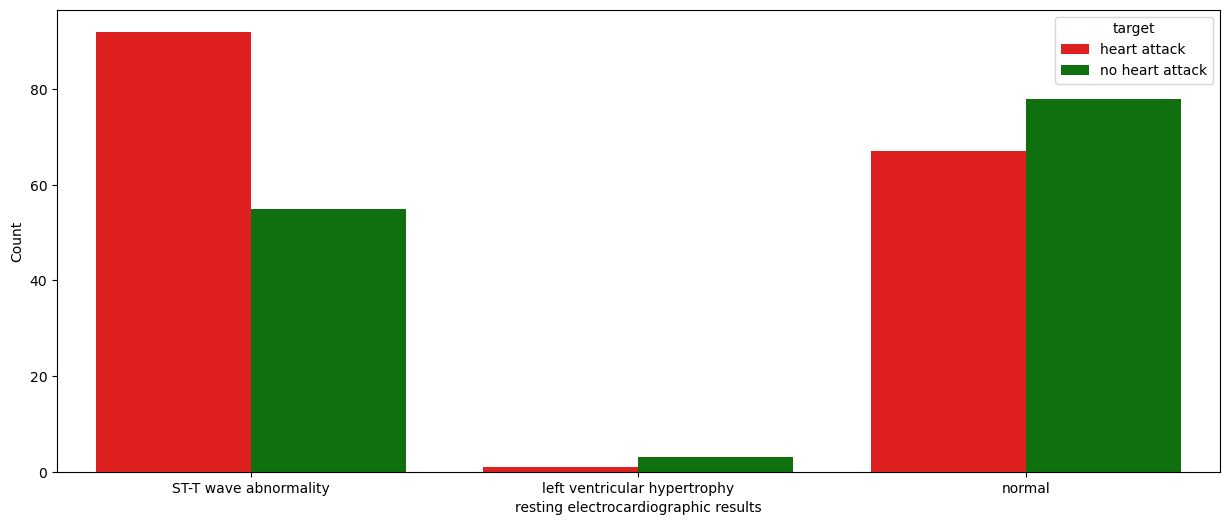

In [155]:
# Set the figure size
plt.figure(figsize=(15, 6))

rest_ecg = heart_copy[['restecg', 'target']].copy()

rest_ecg = rest_ecg.groupby('restecg').value_counts().reset_index()
rest_ecg

ecg_distr = sns.barplot(data = rest_ecg, x = 'restecg', y = 'count', hue = 'target', palette=["red","green"])
ecg_distr.axes.set(xlabel = 'resting electrocardiographic results', ylabel = 'Count')

# Show the plot
plt.show()

### Problem 2: Prediction

The last task is to split the dataset into a training (80% of the dataset) set and a testing (20% of the dataset) set. 

Run a logistic regression and another classification model (based on your own preference).  (Hint: Try scikit learn https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html )

Compute the confusion matrix based on the 2 models. Discuss what you find.

In [161]:
# Performance Metrics
from sklearn.metrics import accuracy_score, classification_report, roc_curve
from sklearn.metrics import confusion_matrix

In [163]:
heart.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [165]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [167]:
# Data pre-processing: One-hot encoding

In [169]:
heart_encoded = pd.get_dummies(heart, columns=['cp', 'restecg', 'thal'], drop_first=True)

heart_encoded.dtypes

age            int64
sex            int64
trestbps       int64
chol           int64
fbs            int64
thalach        int64
exang          int64
oldpeak      float64
slope          int64
ca             int64
target         int64
cp_1            bool
cp_2            bool
cp_3            bool
restecg_1       bool
restecg_2       bool
thal_2          bool
thal_3          bool
dtype: object

In [171]:
heart_encoded.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,0,0,1,False,False,True,False,False,False,False
1,37,1,130,250,0,187,0,3.5,0,0,1,False,True,False,True,False,True,False
2,41,0,130,204,0,172,0,1.4,2,0,1,True,False,False,False,False,True,False
3,56,1,120,236,0,178,0,0.8,2,0,1,True,False,False,True,False,True,False
4,57,0,120,354,0,163,1,0.6,2,0,1,False,False,False,True,False,True,False


In [173]:
# Data pre-processing: Data standardization

In [175]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [177]:
X = heart.drop(['target'], axis=1)
y = heart['target']

In [179]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("The shape of X_train is ", X_train.shape)
print("The shape of X_test is ", X_test.shape)
print("The shape of y_train is ", y_train.shape)
print("The shape of y_test is ", y_test.shape)

The shape of X_train is  (236, 13)
The shape of X_test is  (60, 13)
The shape of y_train is  (236,)
The shape of y_test is  (60,)


In [181]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [183]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [185]:
#### Logistic
logistic_reg = LogisticRegression()

# model training
logistic_reg.fit(X_train, y_train)

# calculating the probabilities
y_pred_prob_train_lg = logistic_reg.predict_proba(X_train)
y_pred_prob_test_lg = logistic_reg.predict_proba(X_test)

# finding the predicted values
y_pred_train_lg = np.argmax(y_pred_prob_train_lg, axis=1)
y_pred_test_lg = np.argmax(y_pred_prob_test_lg, axis=1)

# printing the accuracy -> evaluate overfitting
print("The training accuracy score of Logistic Regression is ", accuracy_score(y_train, y_pred_train_lg))

print("The test accuracy score of Logistic Regression is ", accuracy_score(y_test, y_pred_test_lg))


The training accuracy score of Logistic Regression is  0.8686440677966102
The test accuracy score of Logistic Regression is  0.8666666666666667


### try a different classifier

In [190]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [192]:
random_forest = RandomForestClassifier(random_state=0)

# model training
random_forest.fit(X_train, y_train)

# calculating the predictions
y_pred_train_rf = random_forest.predict(X_train)
y_pred_test_rf = random_forest.predict(X_test)

# printing the accuracy -> evaluate overfitting
print("The training accuracy score of Random Forest is ", accuracy_score(y_train, y_pred_train_rf))
print("The test accuracy score of Random Forest is ", accuracy_score(y_test, y_pred_test_rf))

The training accuracy score of Random Forest is  1.0
The test accuracy score of Random Forest is  0.8666666666666667


### ROC and AUC

In [198]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, accuracy_score, roc_curve, auc

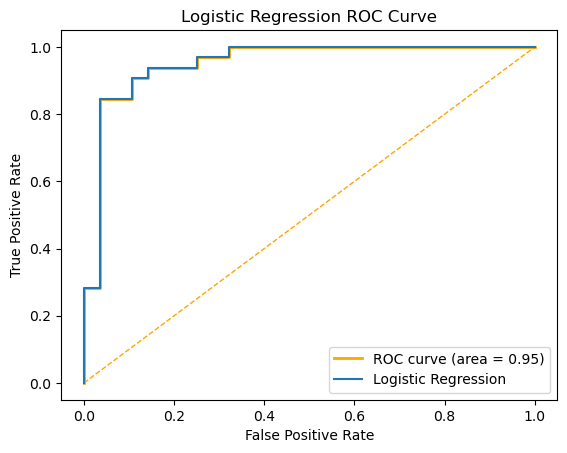

In [200]:
# calculating the probabilities
y_pred_prob_logis = logistic_reg.predict_proba(X_test)[:,1]

# instantiating the roc_curve
fpr_lg, tpr_lg, thresholds_lg = roc_curve(y_test, y_pred_prob_logis)
roc_auc_lg = auc(fpr_lg, tpr_lg)

# plotting the curve
plt.plot(fpr_lg, tpr_lg, color='orange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_lg)
plt.plot([0, 1], [0, 1], color='orange', lw=1, linestyle='--')

plt.plot(fpr_lg, tpr_lg, label='Logistic Regression')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.legend(loc="lower right")
plt.show()

## Confusion Matrix

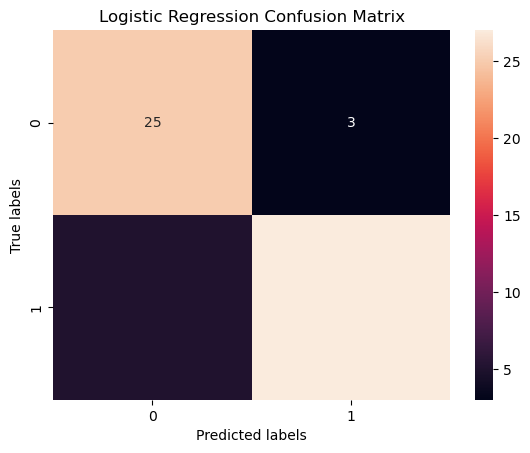

In [203]:
# Generate the confusion matrix for logistic regression
cm_lg = confusion_matrix(y_test, y_pred_test_lg)

# Visualize
sns.heatmap(cm_lg, annot=True, fmt="d")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

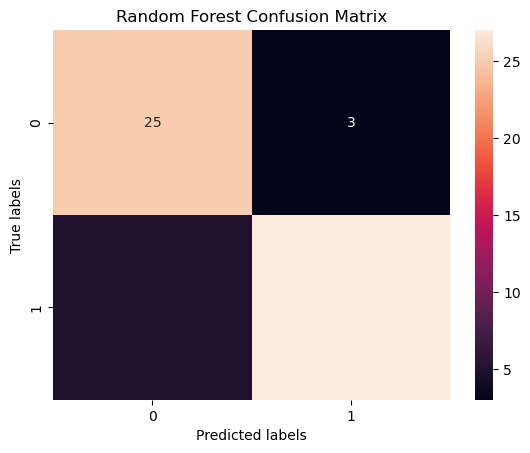

In [205]:
# Generate the confusion matrix for random forest
cm_rf = confusion_matrix(y_test, y_pred_test_rf)

# Visualize
sns.heatmap(cm_rf, annot=True, fmt="d")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Random Forest Confusion Matrix')
plt.show()

In [208]:
# Evaluate the optimized model on the test data
print(classification_report(y_test, y_pred_test_lg))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86        28
           1       0.90      0.84      0.87        32

    accuracy                           0.87        60
   macro avg       0.87      0.87      0.87        60
weighted avg       0.87      0.87      0.87        60



In [210]:
# Evaluate the optimized model on the test data
print(classification_report(y_test, y_pred_test_rf))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86        28
           1       0.90      0.84      0.87        32

    accuracy                           0.87        60
   macro avg       0.87      0.87      0.87        60
weighted avg       0.87      0.87      0.87        60



### Problem 3: Reflection

What concerns do you have about this data and the analysis above? How might data on heart attack status and a model like the one you fit above be used in the real world?

The models, particularly the Random Forest classifier, show high accuracy but raise concerns about overfitting, which may limit their effectiveness on new data. Issues like class imbalance and ethical considerations, such as the potential for biased predictions in healthcare and insurance, also need attention. Ensuring model interpretability is crucial, especially in medical settings.

In real-world use, these models could assist in assessing heart attack risk and guiding preventive measures in healthcare. They could also influence public health strategies and insurance decisions. However, it is vital to ensure these models are transparent, fair, and consistently validated to avoid harmful consequences.